In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [316]:
df = pd.read_csv("data.csv")

In [317]:
target = df["D"].shift(-1)
target = target.dropna()

In [318]:
df = df[:-1]

In [319]:
for index, columns in enumerate(["A", "B", "C", "D"]):
    print(i, columns)
    for i in range(len(df)):
        fill_value = df[columns].iloc[i]
        df[f"{columns}_Lag_{i}"] = df[columns].shift(-i, fill_value=fill_value)


3 A
226 B


C:\Users\Skwix\AppData\Local\Temp/ipykernel_4004/873558226.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{columns}_Lag_{i}"] = df[columns].shift(-i, fill_value=fill_value)


226 C
226 D


In [320]:
df.drop(["A","B","C","D"],axis=1,inplace=True)

In [321]:
df.isnull().sum().sum()

0

In [322]:
target.isnull().sum().sum()

0

In [323]:
target

0      0.7
1      0.9
2      1.1
3      0.9
4      0.9
      ... 
222    1.5
223    1.6
224    1.4
225    1.5
226    1.3
Name: D, Length: 227, dtype: float64

In [324]:
x_train, x_test, y_train, y_test = train_test_split(df,target)

In [325]:
y_test.isnull().sum().sum()

0

# Standard Linear Regression

In [326]:
model = LinearRegression()

In [327]:
model.fit(x_train,y_train)

LinearRegression()

In [328]:
x_test.head(1)

,A_Lag_0,A_Lag_1,A_Lag_2,A_Lag_3,A_Lag_4,A_Lag_5,A_Lag_6,A_Lag_7,A_Lag_8,A_Lag_9,...,D_Lag_217,D_Lag_218,D_Lag_219,D_Lag_220,D_Lag_221,D_Lag_222,D_Lag_223,D_Lag_224,D_Lag_225,D_Lag_226
12,9.37,9.28,9.19,9.1,9.04,9.0,8.95,8.89,8.84,8.73,...,2.0,1.5,1.9,1.4,1.3,1.3,1.5,1.6,1.4,1.5


In [329]:
model.predict(x_test)

array([ 1.81823832,  1.89173045,  2.01762882,  0.18605541,  2.6452106 ,
        2.60953887,  2.24494749,  2.39249675,  1.83701123, -0.10225133,
        2.84358871,  1.13732573, -0.01170568,  2.06783049,  2.12933805,
        2.14987003,  2.11361433,  0.15462099, -0.04190856,  3.80189408,
        2.10180358,  1.51433828,  2.23297852,  1.94615856,  0.04358888,
        0.05046837,  0.57432028,  2.29411563,  2.49992398,  0.51008472,
        2.7181733 ,  0.38984592,  2.54913699,  1.90452823,  1.68213612,
        1.76786453,  0.85547312, -0.02673788,  3.48940581,  1.90061132,
        1.38104351,  1.72402267,  1.99411663,  2.32662527,  1.48562712,
        1.16971574,  2.6789266 ,  1.58477215,  4.12176964,  3.87772765,
        0.16731435, -0.2056404 ,  0.31316165,  2.84397706,  0.44506256,
        2.36425524,  1.40226604])

In [330]:
y_test

12     1.9
94     1.9
52     2.0
203    0.3
162    2.6
29     2.5
69     2.2
84     2.4
40     1.9
207   -0.1
28     2.9
7      1.2
128   -0.1
141    1.9
18     2.0
73     2.2
76     2.0
188    0.4
205    0.0
110    3.3
75     2.0
223    1.6
57     2.2
140    1.9
189    0.3
208    0.0
129    0.5
85     2.2
164    2.5
212    0.5
154    2.8
195    0.6
145    2.7
99     1.9
136    1.5
102    1.7
131    0.9
204   -0.1
107    3.2
59     1.8
220    1.3
93     1.8
34     2.1
64     2.4
222    1.5
0      0.7
155    2.7
134    1.6
113    4.1
112    3.9
122    0.6
124   -0.1
201    0.1
153    3.0
197    0.5
160    2.4
221    1.3
Name: D, dtype: float64

In [331]:
r2_score(y_test, model.predict(x_test))

0.9796525422364465

# Regularisation

In [332]:
myalphas = np.logspace(-6, 6, 13)
train_sizes = 150, 10

models = LinearRegression, RidgeCV, LassoCV
model_names = 'linear regression', 'Ridge regression using CV', 'Lasso regression using CV'

for train_size in train_sizes:
    print('Training with this many datapoints: ', train_size)
    for i, model in enumerate(models):
        print('Using regression of type: ', model_names[i])
        if model == LinearRegression:
            reg = model()
        else:
            print('Trying these complexity parameter values (i.e.alphas): ', myalphas)
            reg = model(alphas=myalphas)
        reg.fit(x_train,y_train)

        if model != LinearRegression:
            print('Using cross-validation got this value for the complexity parameter: ', reg.alpha_)
        for i, name in enumerate(["A","B","C","D"]):
            print('Parameter for {0} is {1}'.format(name,reg.coef_[i]))

        print('Error on held out set is: ', reg.score(x_test,y_test))
        print('\n\n')

Training with this many datapoints:  150
Using regression of type:  linear regression
Parameter for A is -0.014259677451633205
Parameter for B is -0.01594847897657637
Parameter for C is 0.006279759702296234
Parameter for D is -0.02232603731095638
Error on held out set is:  0.9796525422364465



Using regression of type:  Ridge regression using CV
Trying these complexity parameter values (i.e.alphas):  [1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03
 1.e+04 1.e+05 1.e+06]
Using cross-validation got this value for the complexity parameter:  1.0
Parameter for A is -0.013811102095766761
Parameter for B is -0.017718755749449755
Parameter for C is 0.00497639552573266
Parameter for D is -0.02056212944451352
Error on held out set is:  0.980035580436617



Using regression of type:  Lasso regression using CV
Trying these complexity parameter values (i.e.alphas):  [1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03
 1.e+04 1.e+05 1.e+06]
Using cross-vali

# Polynomial Regression

ValueError: Maximum allowed dimension exceeded

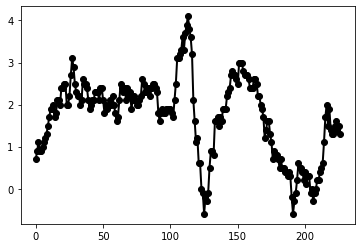

In [337]:
# plot function
lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"]
)
ax.plot([x for x in range(len(target))], target, linewidth=lw, label="ground truth")

# plot training points
ax.scatter([x for x in range(len(target))], target, label="training points")

# polynomial features
for degree in [11]:
    # Pipeline: creates a pipeline of transforms with a final estimator.
    model = make_pipeline(PolynomialFeatures(degree),Ridge(alpha=1e-9))
    model.fit(x_train, y_train)
    y_plot = model.predict([[x] for x in range(len(target))])
    ax.plot([x for x in range(len(target))], y_plot, label=f"degree {degree}")

ax.legend(loc="lower center")
ax.set_ylim(0, 3)
plt.show()